# Clean and Analyze Employee Exit Surveys

In this DataQuest.io project we'll use pandas and NumPy to clean the data from two different surveys and answer some questions.

The surveys are from two different institutes in Australia.

### Questions to be answered :

* Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

* Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

#### Importing and Reading files

First we have to import the libs we are going to use. After that, we read the csv files so we can start working with them using python.

After exploring the files, we've notived that in the Dete Survey, some values whore stored as "Not Stated", so we passed the `na_values` parameter to set those values as NaN.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np

dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')
tafe_survey = pd.read_csv('tafe_survey.csv')

In [2]:
print(dete_survey.info())
dete_survey.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             788 non-null object
DETE Start Date                        749 non-null float64
Role Start Date                        724 non-null float64
Position                               817 non-null object
Classification                         455 non-null object
Region                                 717 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work envir

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [3]:
dete_survey.iloc[:,10:21].head()

,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family
0,True,False,False,True,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False


In [4]:
print(dete_survey['SeparationType'].value_counts())
print(dete_survey['Classification'].value_counts())

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: SeparationType, dtype: int64
Primary              161
Secondary            124
A01-A04               66
AO5-AO7               46
Special Education     33
AO8 and Above         14
PO1-PO4                8
Middle                 3
Name: Classification, dtype: int64


In [5]:
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                              34
DETE Start Date                         73
Role Start Date                         98
Position                                 5
Classification                         367
Region                                 105
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

### Conclusions:

An initial analysis of the DETE Survey shows us 56 columns and many of them seems not be usefull for our objectives.

The last columns have almost all of the values as NaN. We can drop them.

Date columns need to be formatted as numeric.


In [6]:
print(tafe_survey.info())
tafe_survey.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [7]:
tafe_survey.isnull().sum()

Record ID                                                                                                                                                          0
Institute                                                                                                                                                          0
WorkArea                                                                                                                                                           0
CESSATION YEAR                                                                                                                                                     7
Reason for ceasing employment                                                                                                                                      1
Contributing Factors. Career Move - Public Sector                                                                                                                265
Contributi

### Conclusions:

Tafe Survey has more columns as the contributing factors from leaving the job are more detailed.

Columns names need to be better formatted, as they are long.

Less NaN values than the other survey, but we need to explore more to see how to deal.

We also need to drop many columns that are not going to be used in our analysis.

In [8]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
dete_survey_updated = dete_survey.drop(dete_survey.columns[-5:], axis=1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

Since both dataframes were big and had many useless columns (for our objectives), we have droped many of them so we only have to worry about usefull data.

Now we are going to rename the columns so it is standarized in both dataframes and better for working with.

In [9]:
dete_survey_updated.columns = (dete_survey_updated.columns.str.lower()
                              .str.strip()
                              .str.replace(' ','_'))
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'professional_development',
       'opportunities_for_promotion', 'staff_morale', 'workplace_issue',
       'physical_environment', 'worklife_balance',
       'stress_and_pressure_support', 'performance_of_supervisor',
       'peer_support', 'initiative', 'skills', 'coach', 'career_aspirations',
       'feedback', 'further_pd', 'communication', 'my_say', 'inform

In [10]:
columns_rename_dict = {'Record ID': 'id','CESSATION YEAR': 'cease_date','Reason for ceasing employment': 'separationtype','Gender. What is your Gender?': 'gender','CurrentAge. Current Age': 'age','Employment Type. Employment Type': 'employment_status','Classification. Classification': 'position','LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service','LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}
tafe_survey_updated.rename(columns=columns_rename_dict, inplace=True)
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

As we only want to work with cases where the employee resigned, we'll extract only rows where the 'Separation Type' column has 'Resignation' values.

In [11]:
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [12]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [13]:
dete_contains_res = dete_survey_updated['separationtype'].str.contains(r'Resignation')
dete_resignations = dete_survey_updated[dete_contains_res].copy()
dete_resignations.head(10)

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,feedback,further_pd,communication,my_say,information,kept_informed,wellness_programs,health_&_safety,gender,age
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,A,A,A,A,A,N,A,Female,36-40
5,6,Resignation-Other reasons,05/2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,D,A,D,D,D,D,NaN,Female,41-45
8,9,Resignation-Other reasons,07/2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,SD,N,D,SD,D,A,D,N,Female,31-35
9,10,Resignation-Other employer,2012,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,SD,SD,SD,SD,SD,SD,SD,SD,Female,46-50
11,12,Resignation-Move overseas/interstate,2012,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,N,N,N,N,N,N,N,N,Male,31-35
12,13,Resignation-Other reasons,2012,1998.0,1998.0,Teacher,Primary,Far North Queensland,NaN,Permanent Full-time,...,A,SA,A,A,SA,SA,A,A,Female,36-40
14,15,Resignation-Other employer,2012,2007.0,2010.0,Teacher,Secondary,Central Queensland,NaN,Permanent Full-time,...,A,SA,SA,SA,SA,SA,N,SA,Male,31-35
16,17,Resignation-Other reasons,2012,NaN,NaN,Teacher Aide,NaN,South East,NaN,Permanent Part-time,...,M,M,SD,A,A,M,M,M,Male,61 or older
20,21,Resignation-Other employer,2012,1982.0,1982.0,Teacher,Secondary,Central Queensland,NaN,Permanent Full-time,...,A,A,D,SA,N,A,SD,A,Male,56-60
21,22,Resignation-Other reasons,2012,1980.0,2009.0,Cleaner,NaN,Darling Downs South West,NaN,Permanent Part-time,...,SA,SA,SA,SA,SA,SA,NaN,SA,Female,51-55


In [14]:
tafe_resignations = tafe_survey_updated.loc[tafe_survey_updated['separationtype'] == 'Resignation'].copy()
tafe_resignations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340 entries, 3 to 701
Data columns (total 23 columns):
id                                                     340 non-null float64
Institute                                              340 non-null object
WorkArea                                               340 non-null object
cease_date                                             335 non-null float64
separationtype                                         340 non-null object
Contributing Factors. Career Move - Public Sector      332 non-null object
Contributing Factors. Career Move - Private Sector     332 non-null object
Contributing Factors. Career Move - Self-employment    332 non-null object
Contributing Factors. Ill Health                       332 non-null object
Contributing Factors. Maternity/Family                 332 non-null object
Contributing Factors. Dissatisfaction                  332 non-null object
Contributing Factors. Job Dissatisfaction              332 non-null 

The dates employees started working and left the job are important date for our objectives, so it is good to check if they are valid.

In [15]:
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
07/2006      1
2010         1
07/2012      1
09/2010      1
Name: cease_date, dtype: int64

In [16]:
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split('/').str[-1]

In [17]:
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype(float)
dete_resignations['cease_date'].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [18]:
tafe_resignations['cease_date'].value_counts()

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64

In [19]:
dete_resignations['dete_start_date'].value_counts().sort_index(ascending=True)

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64

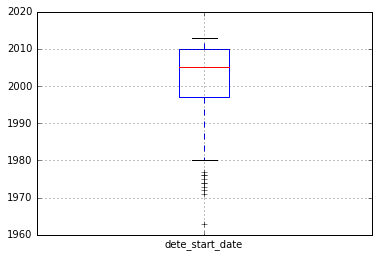

In [20]:
dete_resignations.boxplot(column='dete_start_date')

### Conclusions:

We had to format the cease_date in the dete_resignations df because some values were originaly stored in a MM/YYYY format.

After analysing the data, we saw no logical inconsistencies in the date as they seem reasonable.

We are going to add a 'institute_service' column to store the years of service for each employee.

In [21]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

Our objective in this project is to analyze job dissatisfaction as a cause for employees leaving their jobs. To do that, we are going to find out which employees aswered the survey saying that some kind of dissatisfaction was a contributing factor for them to leave de job.

In [22]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [23]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [24]:
def update_vals(val):
    if pd.isnull(val) == True:
        return np.nan
    elif val == '-':
        return False
    else:
        return True
    

In [25]:
tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']] = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].applymap(update_vals)

In [26]:
tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].any(axis=1, skipna=False)

In [27]:
dete_dissatisfied_columns = [
    'job_dissatisfaction',
    'dissatisfaction_with_the_department',
    'physical_work_environment',
    'lack_of_recognition',
    'lack_of_job_security',
    'work_location',
    'employment_conditions',
    'work_life_balance',
    'workload'
]
dete_resignations['dissatisfied'] = dete_resignations[dete_dissatisfied_columns].any(axis=1, skipna=False)

In [28]:
tafe_resignations_up = tafe_resignations.copy()
dete_resignations_up = dete_resignations.copy()

After cleaning each dataframe, it's time to combine them so we can perform our analysis and answer our questions. First we are going to add a column so we'll be able to identify the origin of the row. Then, we'll combine our dataframes and drop useless columns.

In [29]:
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

In [30]:
combined = pd.concat([dete_resignations_up, tafe_resignations_up])
combined_updated = combined.dropna(thresh=500, axis=1).copy()
combined_updated.head(10)

,age,cease_date,dissatisfied,employment_status,gender,id,institute,institute_service,position,separationtype
3,36-40,2012.0,False,Permanent Full-time,Female,4.0,DETE,7,Teacher,Resignation-Other reasons
5,41-45,2012.0,True,Permanent Full-time,Female,6.0,DETE,18,Guidance Officer,Resignation-Other reasons
8,31-35,2012.0,False,Permanent Full-time,Female,9.0,DETE,3,Teacher,Resignation-Other reasons
9,46-50,2012.0,True,Permanent Part-time,Female,10.0,DETE,15,Teacher Aide,Resignation-Other employer
11,31-35,2012.0,False,Permanent Full-time,Male,12.0,DETE,3,Teacher,Resignation-Move overseas/interstate
12,36-40,2012.0,False,Permanent Full-time,Female,13.0,DETE,14,Teacher,Resignation-Other reasons
14,31-35,2012.0,True,Permanent Full-time,Male,15.0,DETE,5,Teacher,Resignation-Other employer
16,61 or older,2012.0,True,Permanent Part-time,Male,17.0,DETE,NaN,Teacher Aide,Resignation-Other reasons
20,56-60,2012.0,False,Permanent Full-time,Male,21.0,DETE,30,Teacher,Resignation-Other employer
21,51-55,2012.0,False,Permanent Part-time,Female,22.0,DETE,32,Cleaner,Resignation-Other reasons


Now we have to classify the employees by time of service so we can analyze better and answer our questions.

We are going to use the definitions below:

* New: Less than 3 years at a company
* Experienced: 3-6 years at a company
* Established: 7-10 years at a company
* Veteran: 11 or more years at a company

In order to do that, we have to standardize the 'institute_service' columns.

In [31]:
combined_updated['institute_service'].value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
20.0                   7
15.0                   7
14.0                   6
17.0                   6
12.0                   6
10.0                   6
22.0                   6
18.0                   5
16.0                   5
24.0                   4
23.0                   4
11.0                   4
39.0                   3
19.0                   3
21.0                   3
32.0                   3
36.0                   2
25.0                   2
26.0                   2
28.0                   2
30.0                   2
42.0                   1


In [32]:
combined_updated['institute_service'] = (combined_updated['institute_service'].astype('str')
 .str.replace('Less than 1 year','1')
 .str.replace('11-20','20')
 .str.replace('7-10','10')
 .str.replace('1-2','2')
 .str.replace('3-4','4')
 .str.replace('5-6','6')
 .str.replace('More than 20 years','20')                                     
)

combined_updated['institute_service'].value_counts()

nan     88
1       73
2       64
4       63
20      36
6       33
5.0     23
1.0     22
10      21
3.0     20
0.0     20
6.0     17
4.0     16
2.0     14
9.0     14
7.0     13
13.0     8
8.0      8
15.0     7
20.0     7
14.0     6
10.0     6
22.0     6
17.0     6
12.0     6
18.0     5
16.0     5
11.0     4
24.0     4
23.0     4
32.0     3
39.0     3
21.0     3
19.0     3
36.0     2
26.0     2
25.0     2
30.0     2
28.0     2
38.0     1
27.0     1
42.0     1
49.0     1
31.0     1
29.0     1
33.0     1
35.0     1
41.0     1
34.0     1
Name: institute_service, dtype: int64

In [33]:
combined_updated['institute_service'] = combined_updated['institute_service'].astype('float')
combined_updated.info()
combined_updated['institute_service'].value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651 entries, 3 to 701
Data columns (total 10 columns):
age                  596 non-null object
cease_date           635 non-null float64
dissatisfied         643 non-null object
employment_status    597 non-null object
gender               592 non-null object
id                   651 non-null float64
institute            651 non-null object
institute_service    563 non-null float64
position             598 non-null object
separationtype       651 non-null object
dtypes: float64(3), object(7)
memory usage: 55.9+ KB


1.0     95
4.0     79
2.0     78
6.0     50
20.0    43
10.0    27
5.0     23
3.0     20
0.0     20
9.0     14
7.0     13
13.0     8
8.0      8
15.0     7
17.0     6
12.0     6
14.0     6
22.0     6
16.0     5
18.0     5
11.0     4
24.0     4
23.0     4
39.0     3
19.0     3
21.0     3
32.0     3
28.0     2
36.0     2
25.0     2
30.0     2
26.0     2
29.0     1
38.0     1
42.0     1
27.0     1
41.0     1
35.0     1
49.0     1
34.0     1
33.0     1
31.0     1
Name: institute_service, dtype: int64

In [34]:
def rename_career_stage(val):
    if pd.isnull(val) == True:
        return np.nan
    elif val < 3:
        return 'New'
    elif val < 7:
        return 'Experienced'
    elif val < 11:
        return 'Established'
    else:
        return 'Veteran'

In [36]:
combined_updated['service_cat'] = combined_updated['institute_service'].apply(rename_career_stage)
combined_updated.head(10)

,age,cease_date,dissatisfied,employment_status,gender,id,institute,institute_service,position,separationtype,service_cat
3,36-40,2012.0,False,Permanent Full-time,Female,4.0,DETE,7.0,Teacher,Resignation-Other reasons,Established
5,41-45,2012.0,True,Permanent Full-time,Female,6.0,DETE,18.0,Guidance Officer,Resignation-Other reasons,Veteran
8,31-35,2012.0,False,Permanent Full-time,Female,9.0,DETE,3.0,Teacher,Resignation-Other reasons,Experienced
9,46-50,2012.0,True,Permanent Part-time,Female,10.0,DETE,15.0,Teacher Aide,Resignation-Other employer,Veteran
11,31-35,2012.0,False,Permanent Full-time,Male,12.0,DETE,3.0,Teacher,Resignation-Move overseas/interstate,Experienced
12,36-40,2012.0,False,Permanent Full-time,Female,13.0,DETE,14.0,Teacher,Resignation-Other reasons,Veteran
14,31-35,2012.0,True,Permanent Full-time,Male,15.0,DETE,5.0,Teacher,Resignation-Other employer,Experienced
16,61 or older,2012.0,True,Permanent Part-time,Male,17.0,DETE,NaN,Teacher Aide,Resignation-Other reasons,NaN
20,56-60,2012.0,False,Permanent Full-time,Male,21.0,DETE,30.0,Teacher,Resignation-Other employer,Veteran
21,51-55,2012.0,False,Permanent Part-time,Female,22.0,DETE,32.0,Cleaner,Resignation-Other reasons,Veteran


In [37]:
combined_updated['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [39]:
combined_updated['dissatisfied'].fillna(False, inplace=True)

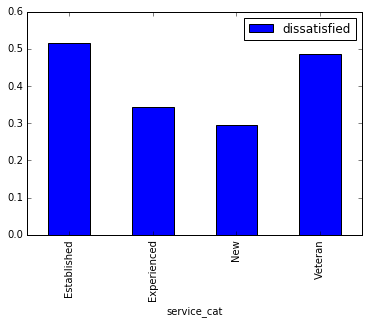

In [42]:
combined_updated.pivot_table('dissatisfied','service_cat').plot(kind='Bar')

Decide how to handle the rest of the missing values. Then, aggregate the data according to the service_cat column again. How many people in each career stage resigned due to some kind of dissatisfaction?

Clean the age column. How many people in each age group resgined due to some kind of dissatisfaction?

Format your project using Dataquest's project style guide.